# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [526]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [527]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [528]:
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [529]:
newyork = temp[temp["State"]=="New York"]
newyork

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [530]:
round(newyork["Temperature"].mean(), 2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [531]:
temp[temp["Temperature"] > 15][["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [532]:
temp[temp["Temperature"] > 15][["State"]]

,State
0,New York
3,Connecticut
5,New Jersey
6,New Jersey


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [533]:
temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20 )]["City"].reset_index().drop(["index"], axis=1)

,City
0,NYC
1,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [534]:
temp.groupby(["State"], as_index=False).agg({"Temperature":["mean", "std"]})

State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [535]:
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [536]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

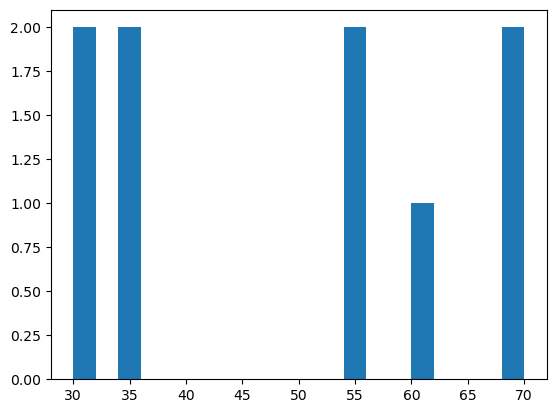

In [537]:
plt.hist(employee["Salary"], bins=20)
plt.show()

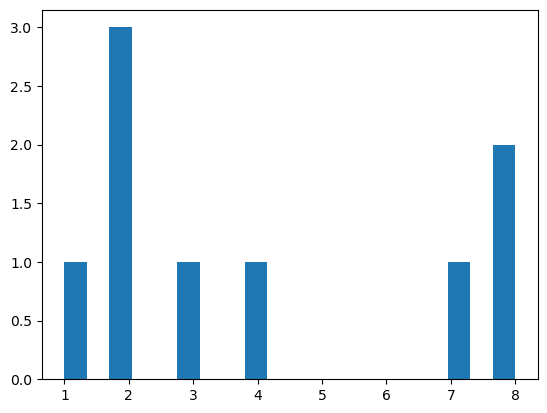

In [538]:
plt.hist(employee["Years"], bins=20)
plt.show()

#### What's the average salary in this company?

In [539]:
round(employee["Salary"].mean(), 2)

48.89

#### What's the highest salary?

In [540]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [541]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [542]:
employee[["Name", "Salary"]].sort_values("Salary").head(3)

,Name,Salary
1,Maria,30
2,David,30
0,Jose,35


#### Could you give all the information about an employee called David?

In [543]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [544]:
employee[employee["Name"] == "David"]["Salary"].reset_index(drop=True)

0    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [545]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [546]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [547]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [548]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [549]:
employee.groupby("Years")["Salary"].mean().reset_index().sort_values("Years").round(2)

,Years,Salary
0,1,35.00
1,2,38.33
2,3,55.00
3,4,35.00
4,7,60.00
5,8,70.00


####  What is the average Salary per title?

In [550]:
employee.groupby("Title")["Salary"].mean().reset_index().round()

,Title,Salary
0,VP,70.0
1,analyst,32.0
2,associate,57.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

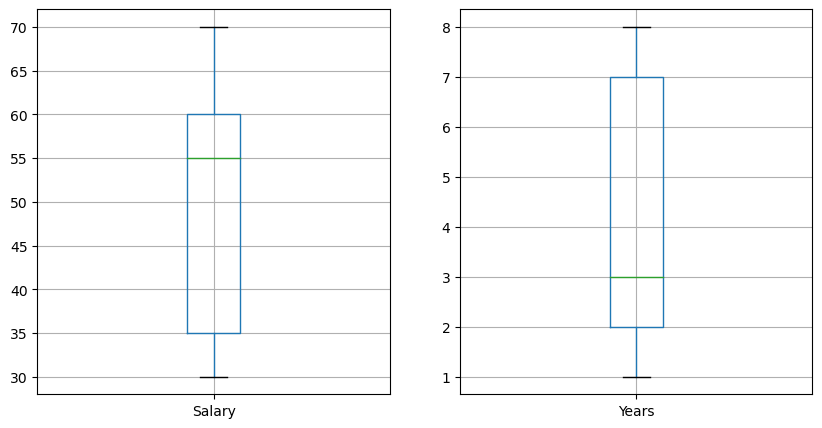

In [551]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
employee.boxplot('Salary', ax=ax[0])
employee.boxplot('Years', ax=ax[1]);

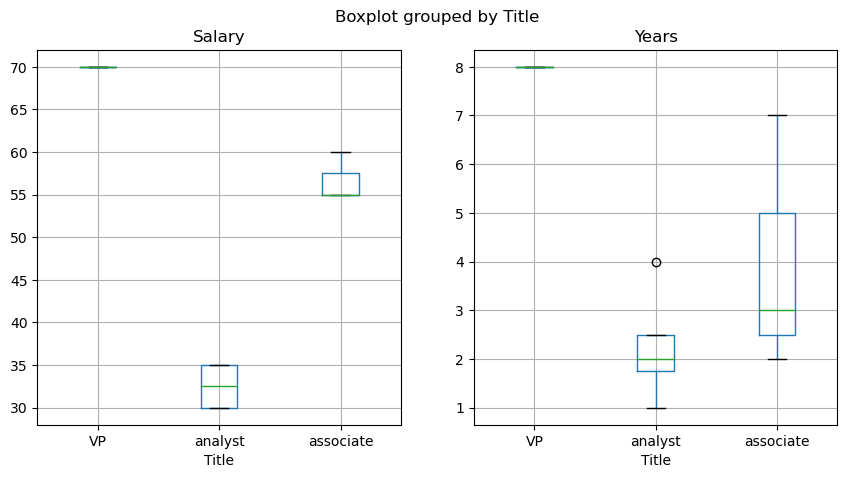

In [552]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
employee.boxplot('Salary','Title', ax=ax[0])
employee.boxplot('Years','Title', ax=ax[1]);

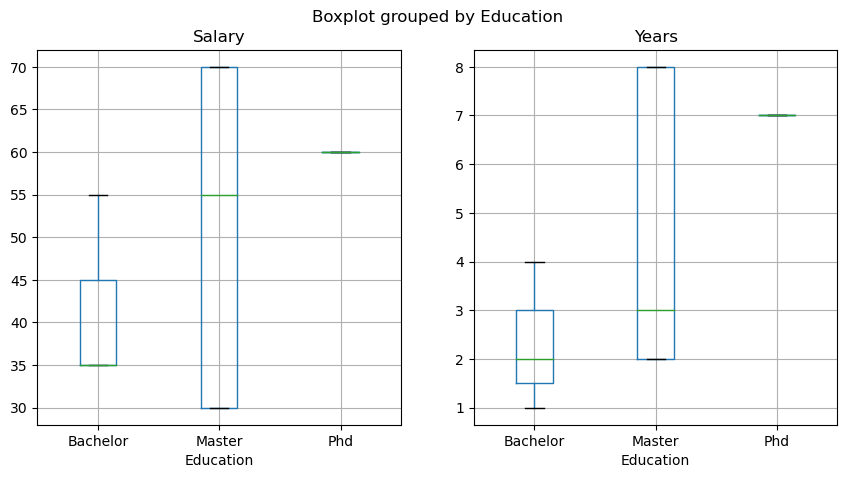

In [577]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
employee.boxplot('Salary','Education', ax=ax[0])
employee.boxplot('Years','Education', ax=ax[1]);

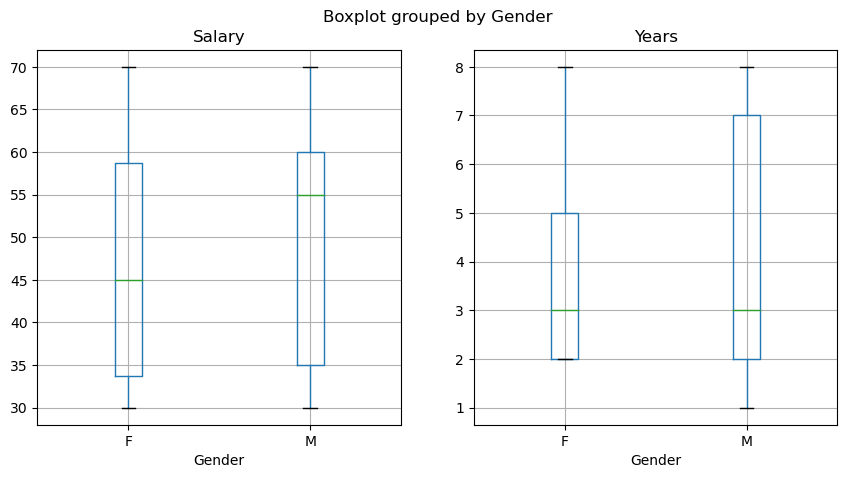

In [578]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
employee.boxplot('Salary','Gender', ax=ax[0])
employee.boxplot('Years','Gender', ax=ax[1]);

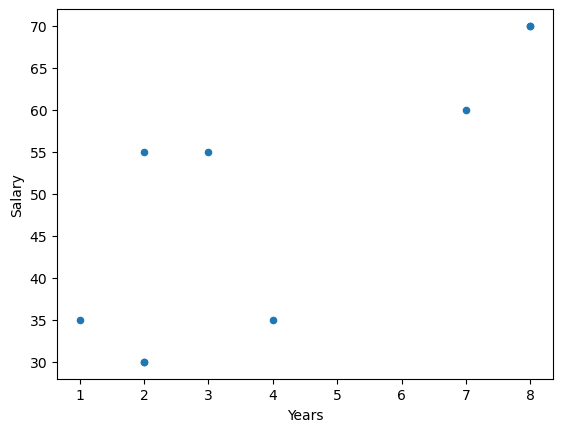

In [583]:
employee.plot.scatter(x='Years', y='Salary');

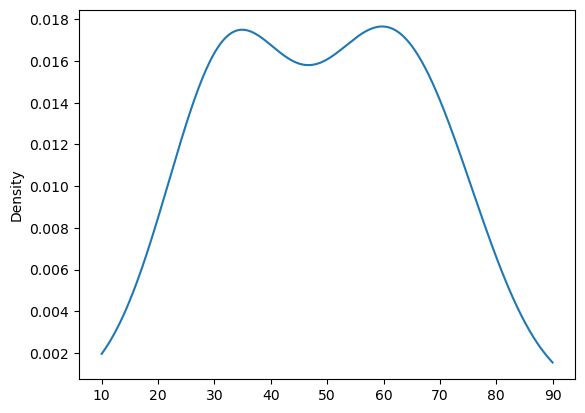

In [553]:
ax = employee["Salary"].plot.kde()

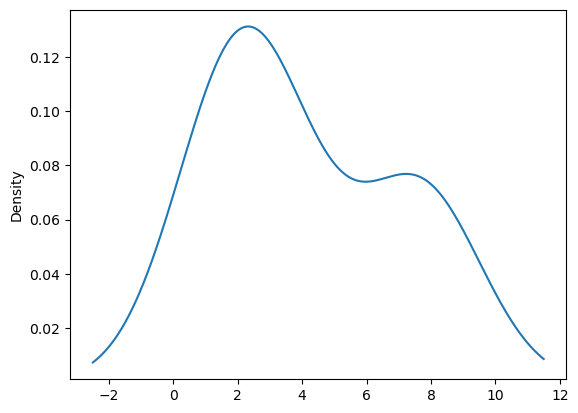

In [579]:
ax = employee["Years"].plot.kde()

In [554]:
# Salary
employee["Salary"].quantile([0.25, 0.5, 0.75]).reset_index()

,index,Salary
0,0.25,35.0
1,0.50,55.0
2,0.75,60.0


In [555]:
# Years
employee["Years"].quantile([0.25, 0.5, 0.75]).reset_index()

,index,Years
0,0.25,2.0
1,0.50,3.0
2,0.75,7.0


#### Is the mean salary per gender different?

In [556]:
# Yes, it is different.
employee.groupby("Gender")["Salary"].mean().reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [557]:
employee.groupby("Department").agg({"Salary":["min", "mean", "max"], "Years":["min", "mean", "max"]})

Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [558]:
employee.groupby("Department").apply(lambda x: x["Salary"].max() - x["Salary"].min()).reset_index(name="Difference")

,Department,Difference
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [559]:
orders = pd.read_csv("orders/Orders.csv", index_col=0)
orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [560]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average Purchase Price?

In [561]:
round(orders["amount_spent"].mean(), 2)

22.39

#### What were the highest and lowest purchase prices? 

In [562]:
orders["amount_spent"].max()

168469.6

In [563]:
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [564]:
spain = orders[orders["Country"] == "Spain"]["CustomerID"].reset_index().drop(["index"], axis=1).drop_duplicates().reset_index().drop(["index"], axis=1)
spain

,CustomerID
0,12557
1,17097
2,12540
3,12551
4,12484
5,12539
6,12510
7,12421
8,12502
9,12462


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [565]:
len(spain)

30

#### Select all the customers who have bought more than 50 items ?

In [566]:
x = orders.groupby("CustomerID")["Quantity"].sum().reset_index()
x[x["Quantity"] > 50]

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4333,18278,66
4335,18281,54
4336,18282,103
4337,18283,1397


#### Select orders from Spain that are above 50 items

In [567]:
orders[orders["Country"] == "Spain"][["CustomerID", "Quantity"]].groupby("CustomerID")["Quantity"].sum().reset_index().sort_values("Quantity", ascending=False)

,CustomerID,Quantity
16,12540,6685
26,12557,4384
28,12597,2236
10,12484,2191
15,12539,2067
7,12454,1006
12,12507,905
11,12502,820
17,12541,680
20,12546,633


#### Select all free orders

In [568]:
orders[orders["amount_spent"] == 0].head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [569]:
orders[orders['Description'].str.contains("lunch bag")].head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [570]:
orders[(orders['Description'].str.contains("lunch bag")) & (orders["year"] == 2011)].head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

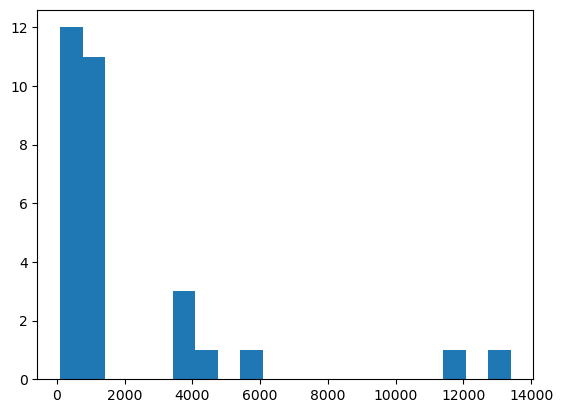

In [571]:
plt.hist(orders[orders["Country"] == "Spain"][["CustomerID", "amount_spent"]].groupby("CustomerID")["amount_spent"].sum().reset_index()["amount_spent"].reset_index().drop(["index"], axis=1), bins=20)
plt.show()

#### Select all orders made in the month of August

In [572]:
orders[orders["month"] == 8].head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [573]:
orders[orders["month"] == 7].groupby("Country").value_counts().reset_index().groupby("Country")["count"].sum().reset_index().sort_values(["count"], ascending=False).head(5)

,Country,count
22,United Kingdom,23599
9,Germany,755
5,EIRE,616
8,France,448
19,Spain,180


#### What's the  average amount of money spent by country

In [574]:
orders[orders["month"] == 7].groupby("Country")["amount_spent"].mean().reset_index().sort_values(["amount_spent"], ascending=False).round(2)

,Country,amount_spent
20,Sweden,125.96
13,Japan,98.83
5,EIRE,66.40
11,Israel,52.99
18,Singapore,52.66
19,Spain,42.36
7,Finland,36.11
0,Australia,31.22
21,Switzerland,29.86
17,Portugal,25.71


#### What's the most expensive item?

In [575]:
orders.sort_values(["UnitPrice"], ascending=False)[["Description", "UnitPrice"]].head(1)

,Description,UnitPrice
173382,postage,8142.75


#### What was the average amount spent per year ?

In [576]:
orders.groupby("year")["amount_spent"].mean().reset_index().round(2)

,year,amount_spent
0,2010,21.89
1,2011,22.43


<Axes: xlabel='Quantity', ylabel='amount_spent'>

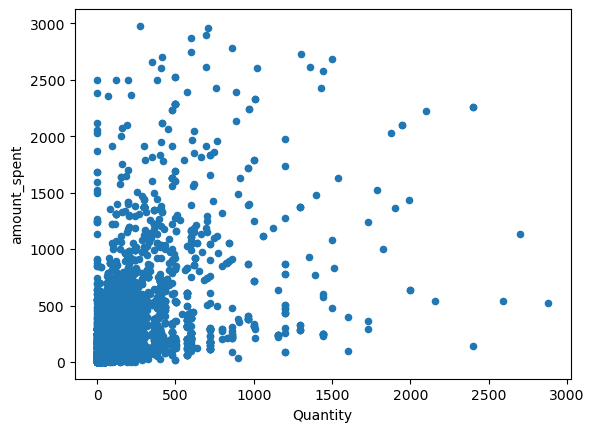

In [604]:
orders[(orders["amount_spent"]<3000) & (orders["Quantity"]<3000)].plot.scatter(x="Quantity", y="amount_spent")